<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 757, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 757 (delta 93), reused 46 (delta 16), pack-reused 573
Receiving objects: 100% (757/757), 322.81 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (394/394), done.
Checking out files: 100% (118/118), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 2.9 MB/s 


In [3]:
import os 
import numpy as np
from google.colab import files

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *
from CrispCerebella.Code.test_functions import *

In [5]:
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:", testX.shape, testy.shape)


Shape of test Data: (2947, 128, 9) (2947, 1)


In [6]:
y_labels = load_labels('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/y_test.txt')

In [7]:
acc_LSTM = "9138"
acc_CNNLSTM ="9192"
acc_ConvLSTM ="9053"
acc_Transfer = "8649"

In [8]:
# unzip the folder of the model with a given accuracy
!unzip /content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_Transfermodel_{acc_Transfer}.zip 

Archive:  /content/CrispCerebella/Models/Final_Model_LSTM_9138.zip
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.index  
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.data-00000-of-00001  
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/assets/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/keras_metadata.pb  
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/saved_model.pb  
Archive:  /content/CrispCerebella/Models/Final_Model_CNNLSTM_9192.zip
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.index  
  inflating: content/CrispCerebella/M

In [9]:
# load the saved LSTM model
BestLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}')

{'LAYING': {'precision': 0.9707724425887265, 'recall': 0.9375, 'f1-score': 0.9538461538461538, 'support': 496}, 'SITTING': {'precision': 0.8379888268156425, 'recall': 0.9554140127388535, 'f1-score': 0.8928571428571428, 'support': 471}, 'STANDING': {'precision': 0.9391891891891891, 'recall': 0.9928571428571429, 'f1-score': 0.9652777777777778, 'support': 420}, 'WALKING': {'precision': 0.8544698544698545, 'recall': 0.8370672097759674, 'f1-score': 0.845679012345679, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8923679060665362, 'recall': 0.8571428571428571, 'f1-score': 0.8744007670182166, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.997979797979798, 'recall': 0.9199255121042831, 'f1-score': 0.9573643410852714, 'support': 537}, 'accuracy': 0.9138106549032915, 'macro avg': {'precision': 0.9154613361849577, 'recall': 0.9166511224365174, 'f1-score': 0.9149041991550403, 'support': 2947}, 'weighted avg': {'precision': 0.9164760449612768, 'recall': 0.9138106549032915, 'f1-score'

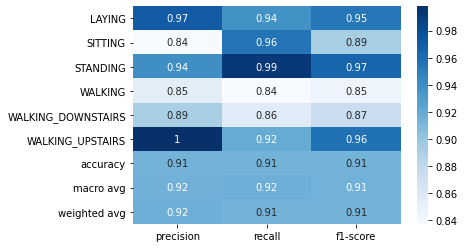

In [10]:
# Heatmap for the LSTM model
create_heatmap(BestLSTMModel, testX, testy, y_labels)

In [11]:
# load the saved CNNLSTM model
BestCNNLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}')

In [12]:
n_features =testX.shape[2]
n_steps, n_length = 4, 32
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

{'LAYING': {'precision': 0.9477911646586346, 'recall': 0.9516129032258065, 'f1-score': 0.9496981891348089, 'support': 496}, 'SITTING': {'precision': 1.0, 'recall': 0.9002123142250531, 'f1-score': 0.9474860335195531, 'support': 471}, 'STANDING': {'precision': 0.8895966029723992, 'recall': 0.9976190476190476, 'f1-score': 0.9405162738496072, 'support': 420}, 'WALKING': {'precision': 0.8497854077253219, 'recall': 0.8065173116089613, 'f1-score': 0.8275862068965518, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8397085610200364, 'recall': 0.8665413533834586, 'f1-score': 0.852913968547641, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.9962894248608535, 'recall': 1.0, 'f1-score': 0.9981412639405204, 'support': 537}, 'accuracy': 0.9192399049881235, 'macro avg': {'precision': 0.9205285268728742, 'recall': 0.9204171550103878, 'f1-score': 0.9193903226481138, 'support': 2947}, 'weighted avg': {'precision': 0.9208388197235023, 'recall': 0.9192399049881235, 'f1-score': 0.9190464798795

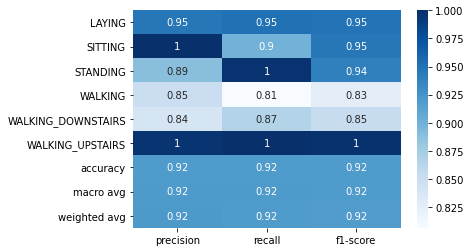

In [13]:
# Heatmap for the CNNLSTM model
create_heatmap(BestCNNLSTMModel, testX, testy, y_labels)

In [14]:
# load the saved ConvLSTM model
BestConvLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}')

In [15]:
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

{'LAYING': {'precision': 0.9591397849462365, 'recall': 0.8991935483870968, 'f1-score': 0.9281997918834547, 'support': 496}, 'SITTING': {'precision': 0.8493150684931506, 'recall': 0.921443736730361, 'f1-score': 0.8839103869653767, 'support': 471}, 'STANDING': {'precision': 0.8942528735632184, 'recall': 0.9261904761904762, 'f1-score': 0.9099415204678364, 'support': 420}, 'WALKING': {'precision': 0.8451882845188284, 'recall': 0.8228105906313645, 'f1-score': 0.8338493292053663, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8790786948176583, 'recall': 0.8609022556390977, 'f1-score': 0.8698955365622032, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 537}, 'accuracy': 0.9053274516457415, 'macro avg': {'precision': 0.9044957843898486, 'recall': 0.905090101263066, 'f1-score': 0.9042994275140396, 'support': 2947}, 'weighted avg': {'precision': 0.9063468784634876, 'recall': 0.9053274516457415, 'f1-score': 0.9053575750669509, 'support': 

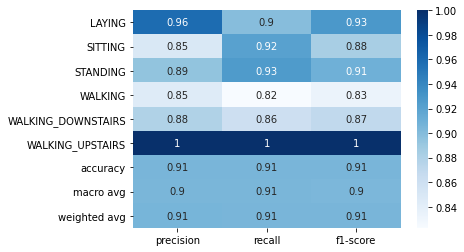

In [16]:
# Heatmap for the ConvLSTM model
create_heatmap(BestConvLSTMModel, testX, testy, y_labels)

In [17]:
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:", testX.shape, testy.shape)

Shape of test Data: (2947, 128, 9) (2947, 1)


In [18]:
testX = testX[:,:,[0,1,2,6,7,8]]
n_features =testX.shape[2]
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

In [19]:
# load the saved Transfer model
BestTransferModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_Transfermodel_{acc_Transfer}')

{'LAYING': {'precision': 0.8709016393442623, 'recall': 0.8568548387096774, 'f1-score': 0.8638211382113821, 'support': 496}, 'SITTING': {'precision': 0.7332123411978222, 'recall': 0.8577494692144374, 'f1-score': 0.7906066536203522, 'support': 471}, 'STANDING': {'precision': 0.9319899244332494, 'recall': 0.8809523809523809, 'f1-score': 0.9057527539779683, 'support': 420}, 'WALKING': {'precision': 0.8571428571428571, 'recall': 0.7576374745417516, 'f1-score': 0.8043243243243242, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8300884955752212, 'recall': 0.881578947368421, 'f1-score': 0.8550592525068368, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.994140625, 'recall': 0.9478584729981379, 'f1-score': 0.9704480457578647, 'support': 537}, 'accuracy': 0.8649474041398032, 'macro avg': {'precision': 0.8695793137822353, 'recall': 0.863771930630801, 'f1-score': 0.8650020280664547, 'support': 2947}, 'weighted avg': {'precision': 0.8703982803559734, 'recall': 0.8649474041398032, 'f1-s

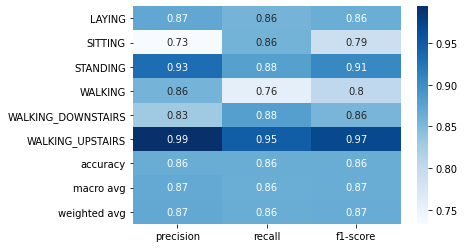

In [20]:
# Heatmap for the Transfer model
create_heatmap(BestTransferModel, testX, testy, y_labels)